<a href="https://colab.research.google.com/github/SHAIKAMANBASHA/Product_Feature_Extractor/blob/main/Product_Feature_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("product_feature_summary.csv")

In [ ]:
features = []
for row in df['extracted_features'].dropna():
    for line in row.split("\n"):
        if "Feature:" in line:
            part = line.replace("Feature: ", "").split(", Sentiment: ")
            if len(part) == 2:
                features.append((part[0].strip().lower(), part[1].strip().lower()))

In [15]:
# Analyze results
features_df = pd.DataFrame(features, columns=["feature", "sentiment"])
print(features_df['feature'].value_counts())


feature
battery life      3
screen            2
heating           2
camera            2
design            1
sound             1
volume            1
touch response    1
speaker           1
display           1
performance       1
weight            1
build quality     1
Name: count, dtype: int64


In [16]:
print(features_df['sentiment'].value_counts())


sentiment
positive    10
negative     8
Name: count, dtype: int64


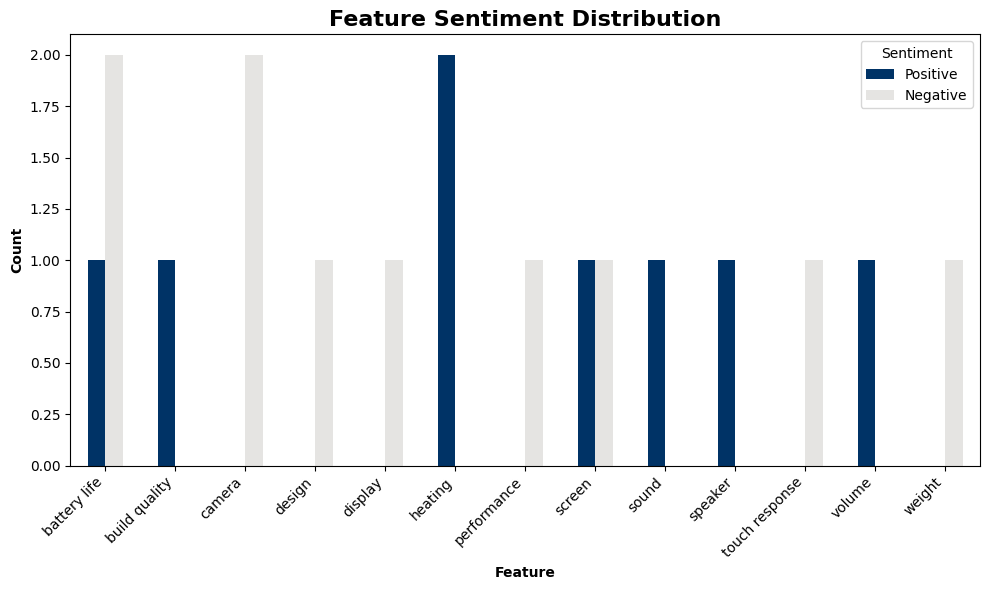

In [17]:
colors = ['#003366', '#E5E4E2']
pivot = features_df.pivot_table(index='feature', columns='sentiment', aggfunc='size', fill_value=0)
pivot.plot(kind="bar", figsize=(10, 6), color=colors)
plt.title("Feature Sentiment Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Feature", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.legend(["Positive", "Negative"], title="Sentiment", fontsize=10)
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd

# Load the extracted features CSV into a DataFrame
df = pd.read_csv("product_feature_summary.csv")

# Create a list to store (feature, sentiment) pairs
features = []
for row in df['extracted_features'].dropna():
    for line in row.split("\n"):
        if "Feature:" in line:
            part = line.replace("Feature: ", "").split(", Sentiment: ")
            if len(part) == 2:
                features.append((part[0].strip().lower(), part[1].strip().lower()))

# Convert to DataFrame
features_df = pd.DataFrame(features, columns=["feature", "sentiment"])

# Get counts of features and sentiments
feature_counts = features_df['feature'].value_counts()
sentiment_counts = features_df['sentiment'].value_counts()

# Group by feature and sentiment
grouped_counts = features_df.groupby(['feature', 'sentiment']).size().unstack(fill_value=0)

# Display summaries
print("🔝 Top 3 Most Appreciated Features:")
print(grouped_counts.sort_values('positive', ascending=False).head(3))

print("\n🔻 Top 3 Least Appreciated Features:")
print(grouped_counts.sort_values('negative', ascending=False).head(3))

print("\n📊 Full Feature Feedback Summary:")
print(grouped_counts)


🔝 Top 3 Most Appreciated Features:
sentiment     negative  positive
feature                         
battery life         1         2
camera               0         2
design               0         1

🔻 Top 3 Least Appreciated Features:
sentiment      negative  positive
feature                          
heating               2         0
build quality         1         0
sound                 1         0

📊 Full Feature Feedback Summary:
sentiment       negative  positive
feature                           
battery life           1         2
build quality          1         0
camera                 0         2
design                 0         1
display                0         1
heating                2         0
performance            0         1
screen                 1         1
sound                  1         0
speaker                1         0
touch response         0         1
volume                 1         0
weight                 0         1
